In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import json

%matplotlib inline

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from keras.layers import *
from keras.optimizers import *
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons
from tensorflow.keras.optimizers import RMSprop,SGD


In [2]:
# Load .env environment variables
load_dotenv()

True

In [3]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY_ID")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [4]:
# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [5]:
# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [8]:
# Set timeframe to '1D' pulling non-vol stock data
timeframe = "1D"

# Set start and end datetimes between now and 3 years ago.
start_date = pd.Timestamp("2020-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-06-01", tz="America/New_York").isoformat()
# Set the ticker info
tickers = ["SQ","IBM","ENPH","WKHS","BRP","DX","RIOT","TTD","DXC"]


In [9]:
small_cap_tick = api.get_barset(
   tickers,
   timeframe,
   start=start_date,
   end=end_date,
   limit=1000
).df
# Display sample data
small_cap_tick.head()

Small cap 250 min to 2 b
Mid Cap 2 bill and 10 bill
Large cap  at least 10 billion


BRP                                  DX         \
                            open   high    low  close  volume   open   high   
time                                                                          
2020-01-02 00:00:00-05:00  16.09  16.37  15.81  16.33  148601  16.99  17.01   
2020-01-03 00:00:00-05:00  16.17  16.81  16.06  16.66  237760  16.87  17.08   
2020-01-06 00:00:00-05:00  16.59  16.67  16.27  16.40  153582  17.06  17.29   
2020-01-07 00:00:00-05:00  16.30  16.42  16.01  16.24  233111  17.23  17.40   
2020-01-08 00:00:00-05:00  16.19  16.51  16.02  16.16  485579  17.36  17.47   

                                                  ...     TTD           \
                              low  close  volume  ...    open     high   
time                                              ...                    
2020-01-02 00:00:00-05:00  16.820  16.94  178488  ...  263.52  272.128   
2020-01-03 00:00:00-05:00  16.860  17.04  154458  ...  264.75  273.390   
2020-01-06 00:00:00-05:00  17.050  17.19  179365  ...  267.01  280.070   
2020-01-07 00:00:00-05:00  17.190  17.40  169348  ...  279.04  285.600   
2020-01-08 00:00:00-05:00  17.285  17.30  130177  ...  280.28  289.290   

                                                      WKHS                     \
                               low    close   volume  open  high    low close   
time                                                                            
2020-01-02 00:00:00-05:00  261.055  271.360  2129184  3.06  3.10  2.965  3.07   
2020-01-03 00:00:00-05:00  262.240  271.920  1330371  3.00  3.10  2.980  3.07   
2020-01-06 00:00:00-05:00  266.010  277.900  1756027  3.05  3.25  3.000  3.22   
2020-01-07 00:00:00-05:00  274.290  280.135  2168216  3.23  3.37  3.230  3.28   
2020-01-08 00:00:00-05:00  279.140  285.320  1939399  3.26  3.40  3.200  3.39   

                                    
                            volume  
time                                
2020-01-02 00:00:00-05:00   918517  
2020-01-03 00:00:00-05:00  1012818  
2020-01-06 00:00:00-05:00   837917  
2020-01-07 00:00:00-05:00  1153037  
2020-01-08 00:00:00-05:00  1588326  

[5 rows x 45 columns]

In [10]:
groups = {"Small cap":["WKHS","BRP","DX"], "Mid cap":["RIOT","TTD","DXC"],"Large cap":["SQ","IBM","ENPH"]}

In [11]:
#groups = {"Large cap":["SQ","IBM","ENPH"]}

In [12]:
small_cap_tick.isna().sum()


BRP   open      0
      high      0
      low       0
      close     0
      volume    0
DX    open      0
      high      0
      low       0
      close     0
      volume    0
DXC   open      2
      high      2
      low       2
      close     2
      volume    2
ENPH  open      2
      high      2
      low       2
      close     2
      volume    2
IBM   open      0
      high      0
      low       0
      close     0
      volume    0
RIOT  open      2
      high      2
      low       2
      close     2
      volume    2
SQ    open      0
      high      0
      low       0
      close     0
      volume    0
TTD   open      0
      high      0
      low       0
      close     0
      volume    0
WKHS  open      0
      high      0
      low       0
      close     0
      volume    0
dtype: int64

In [13]:
def window_data(Small_cap_tick, window, feature_col_number, target_col_number):
    X = []
    y = []
    for i in range(len(Small_cap_tick) - window - 1):
        features = Small_cap_tick.iloc[i:(i + window), feature_col_number]
        target = Small_cap_tick.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(
        
        
        
        
        X), np.array(y).reshape(-1, 1)

In [14]:
large_cap = []

In [15]:
#creating function to pull ticker names
def training_model(tickers):
    Small_cap_tick = api.get_barset(
       tickers,
       timeframe,
       start=start_date,
       end=end_date,
       limit=1000
    ).df
    # Display sample data
    Small_cap_tick.head()
    
    #
    data = np.array(Small_cap_tick)

    # train test split, we can take last 100 data points as test set
    train , test = data[0:-100], data[-100:]
    
   
        # Predict Closing Prices using a 10 day window of previous closing prices
    # Then, experiment with window sizes anywhere from 1 to 10 and see how the model performance changes
    window_size = 10

    # Column index 0 is the 'ticker' column
    # Column index 1 is the `Close` column
    feature_column = 1
    target_column = 1
    X, y = window_data(Small_cap_tick, window_size, feature_column, target_column)
    

        # Use 70% of the data for training and the remaineder for testing
    data_train = int(.7 * len(X))
    X_train = X[:data_train - 1]
    X_test = X[data_train:]
    y_train = y[:data_train - 1]
    y_test = y[data_train:]
    
        # Use the MinMaxScaler to scale data between 0 and 1.
    from sklearn.preprocessing import MinMaxScaler
    x_train_scaler = MinMaxScaler()
    x_test_scaler = MinMaxScaler()
    y_train_scaler = MinMaxScaler()
    y_test_scaler = MinMaxScaler()

    # Fit the scaler for the training Data
    x_train_scaler.fit(X_train)
    y_train_scaler.fit(y_train)

    # Scale the training data
    X_train = x_train_scaler.transform(X_train)
    y_train = y_train_scaler.transform(y_train)

    # Fit the scaler for the testing Data
    x_test_scaler.fit(X_test)
    y_test_scaler.fit(y_test)

    # Scale the y_test data
    X_test = x_test_scaler.transform(X_test)
    y_test = y_test_scaler.transform(y_test)

        # Reshape the features for the model
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

    # Build the LSTM model. 
       
    # Note: Batching inputs has a different input shape of Samples/TimeSteps/Features
    model = Sequential()
    model.add(LSTM(
        units=30, return_sequences=True,
        input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=30, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=30))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    
    opt = SGD(lr=0.01, momentum=0.9, clipnorm=1.0)
    model.compile(loss='mean_squared_error', optimizer=opt)

    
        # Compile the model
    #model.compile(optimizer='adam', loss='mean_squared_error')

        # Summarize the model
    #model.summary()
    
        # Train the model
    # Use at least 10 epochs
    model.fit(X_train, y_train, epochs=25, shuffle=False, batch_size=1,
        verbose=1)
    
        # Evaluate the model
    model.evaluate(X_test, y_test)
    print ("test loss")
    print (model.evaluate(X_test, y_test))
    
            # Make some predictions
    predicted = model.predict(X_test)

        # Recover the original prices instead of the scaled version
    predicted_prices = y_test_scaler.inverse_transform(predicted)
    real_prices = y_test_scaler.inverse_transform(y_test.reshape(-1, 1))
    
        # Create a DataFrame of Real and Predicted values
    stocks = pd.DataFrame({
        "Real": real_prices.ravel(),
        "Predicted": predicted_prices.ravel()
    }, index = Small_cap_tick.index[-len(real_prices): ]) 
    stocks.head()
    
    return stocks

In [17]:
#training_model(Small_cap_tick)

In [18]:
#clipnorm=0.1


Small cap


C:\Users\likem\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/25
240/240 [==============================] - 78s 66ms/step - loss: 0.0100 0s - loss: 0
Epoch 2/25
240/240 [==============================] - 14s 59ms/step - loss: 0.0162
Epoch 3/25
240/240 [==============================] - 12s 50ms/step - loss: 0.0155
Epoch 4/25
240/240 [==============================] - 10s 40ms/step - loss: 0.0163
Epoch 5/25
240/240 [==============================] - 8s 34ms/step - loss: 0.0167
Epoch 6/25
240/240 [==============================] - 8s 32ms/step - loss: 0.0175
Epoch 7/25
240/240 [==============================] - 12s 48ms/step - loss: 0.0177
Epoch 8/25
240/240 [==============================] - 13s 55ms/step - loss: 0.0178
Epoch 9/25
240/240 [==============================] - 14s 59ms/step - loss: 0.0180
Epoch 10/25
240/240 [==============================] - 13s 53ms/step - loss: 0.0180
Epoch 11/25
240/240 [==============================] - 11s 47ms/step - loss: 0.0180
Epoch 12/25
240/240 [==============================] - 17s 70ms/step - los

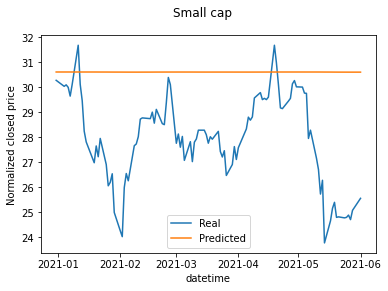

Mid cap


C:\Users\likem\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/25
240/240 [==============================] - 140s 80ms/step - loss: 0.0268:  - ETA:  - ETA: 0s - loss: 0. - ETA: 0s - loss: 0.
Epoch 2/25
240/240 [==============================] - 17s 71ms/step - loss: 0.0112
Epoch 3/25
240/240 [==============================] - 13s 56ms/step - loss: 0.0101
Epoch 4/25
240/240 [==============================] - 11s 45ms/step - loss: 0.0118- 
Epoch 5/25
240/240 [==============================] - 9s 36ms/step - loss: 0.0136: 0s - loss
Epoch 6/25
240/240 [==============================] - 12s 49ms/step - loss: 0.0140
Epoch 7/25
240/240 [==============================] - 14s 58ms/step - loss: 0.0142
Epoch 8/25
240/240 [==============================] - 12s 50ms/step - loss: 0.0148
Epoch 9/25
240/240 [==============================] - 11s 45ms/step - loss: 0.0150 1s
Epoch 10/25
240/240 [==============================] - 11s 45ms/step - loss: 0.0152
Epoch 11/25
240/240 [==============================] - 13s 54ms/step - loss: 0.0153 4s -  - ETA:  - 


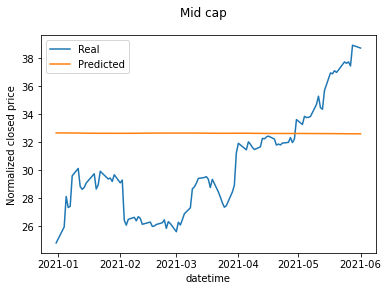

Large cap


C:\Users\likem\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/25
240/240 [==============================] - 47s 35ms/step - loss: nan
Epoch 2/25
240/240 [==============================] - 8s 32ms/step - loss: nan
Epoch 3/25
240/240 [==============================] - 7s 29ms/step - loss: nan
Epoch 4/25
240/240 [==============================] - 7s 29ms/step - loss: nan
Epoch 5/25
240/240 [==============================] - 7s 31ms/step - loss: nan
Epoch 6/25
240/240 [==============================] - 8s 34ms/step - loss: nan
Epoch 7/25
240/240 [==============================] - 8s 32ms/step - loss: nan
Epoch 8/25
240/240 [==============================] - 8s 33ms/step - loss: nan
Epoch 9/25
240/240 [==============================] - 8s 33ms/step - loss: nan
Epoch 10/25
240/240 [==============================] - 8s 32ms/step - loss: nan
Epoch 11/25
240/240 [==============================] - 8s 34ms/step - loss: nan
Epoch 12/25
240/240 [==============================] - 9s 36ms/step - loss: nan
Epoch 13/25
240/240 [===========================

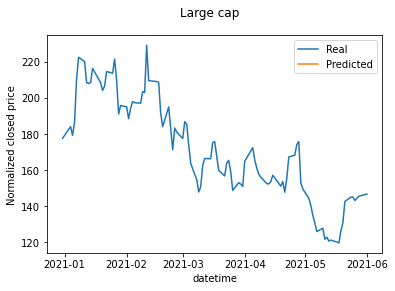

In [19]:
for(name,l) in groups.items():
    print (name)
    stocks = (training_model(l))
    plt.plot(stocks.index, stocks[["Real"]],label="Real")
    plt.plot(stocks.index, stocks[["Predicted"]], label="Predicted")
    plt.suptitle(name)
    plt.xlabel("datetime")
    plt.ylabel("Normalized closed price")
    plt.legend()
    plt.show()
    
    #print (training_model(l))
    